# Aravinda Raman J

## Internship project -- Ai Council

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
%matplotlib inline

In [2]:
data_df = pd.read_csv('coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')
meta_df = pd.read_csv('coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv')

In [3]:
data_df

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [4]:
meta_df

,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,0,Normal,NaN,NaN,1576
1,1,Pnemonia,Stress-Smoking,ARDS,2
2,2,Pnemonia,Virus,NaN,1493
3,3,Pnemonia,Virus,COVID-19,58
4,4,Pnemonia,Virus,SARS,4
5,5,Pnemonia,bacteria,NaN,2772
6,6,Pnemonia,bacteria,Streptococcus,5


In [5]:
test_dir ='coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_dir = 'coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'


In [6]:
train_data = data_df[data_df['Dataset_type'] == 'TRAIN']
test_data = data_df[data_df['Dataset_type'] == 'TEST']

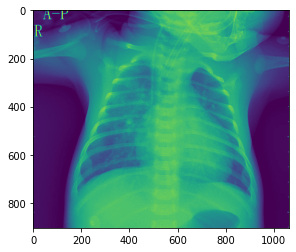

In [7]:
from PIL import Image
im = Image.open(train_dir+'/person588_virus_1135.jpeg')
plt.imshow(im)
plt.show()

In [8]:
sample_df = train_data[train_data['Label_2_Virus_category'] == 'COVID-19'].sample(3)
sample_df1 = train_data[train_data['Label'] == 'Normal'].sample(3)
sample_df2 = train_data[train_data['Label'] == 'Pnemonia'].sample(3)

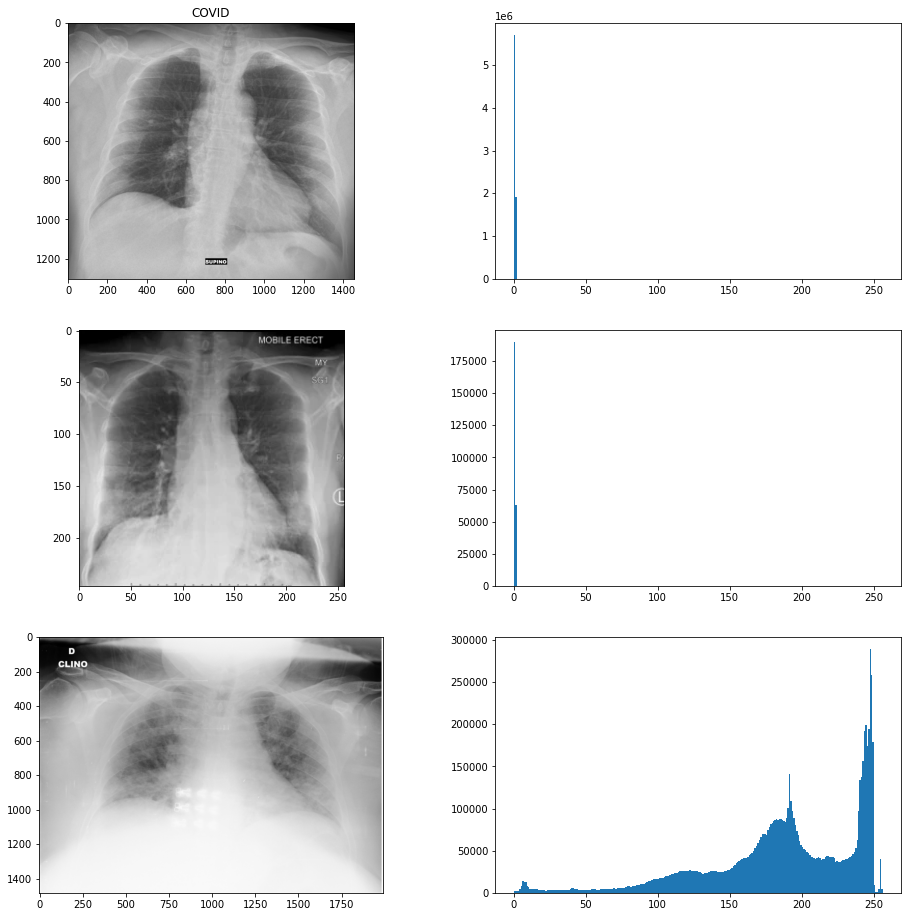

<Figure size 1080x1080 with 0 Axes>

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))


plt.figure(figsize = (15,15))

for i,image in enumerate(sample_df['X_ray_image_name']):
    im = plt.imread(train_dir+'/'+image)
    ax[i, 0].imshow(im)
    ax[i,1].hist(im.ravel(),256,[0,256])
    ax[0, 0].set_title('COVID')
   


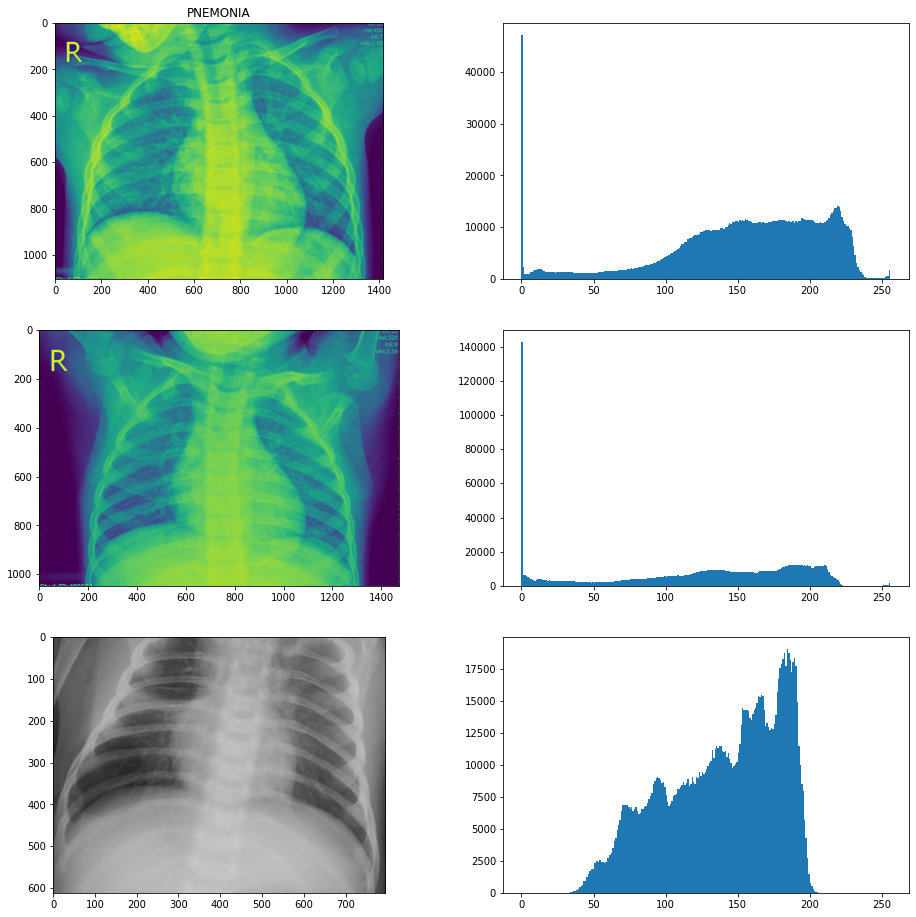

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))
for i,image in enumerate(sample_df2['X_ray_image_name']):
    im = plt.imread(train_dir+'/'+image)
    ax[i, 0].imshow(im)
    ax[i,1].hist(im.ravel(),256,[0,256])
    ax[0, 0].set_title('PNEMONIA')

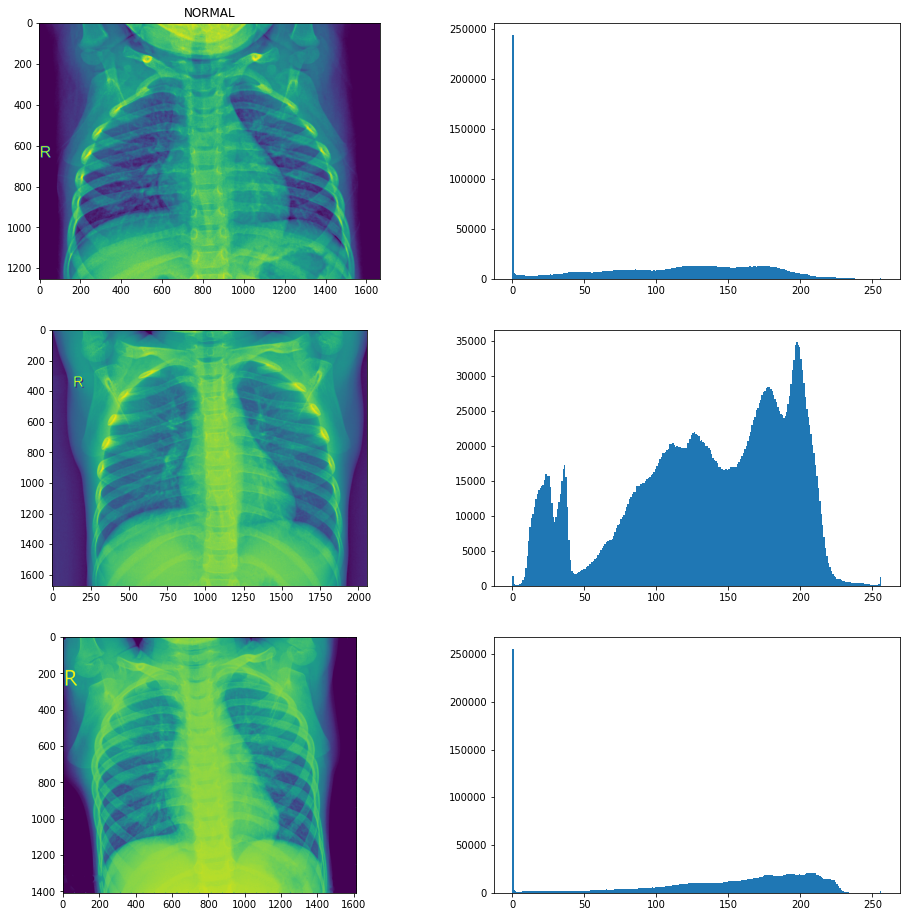

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))
for i,image in enumerate(sample_df1['X_ray_image_name']):
    im = plt.imread(train_dir+'/'+image)
    ax[i, 0].imshow(im)
    ax[i,1].hist(im.ravel(),256,[0,256])
    ax[0, 0].set_title('NORMAL')

In [12]:
train_data.fillna('NA', inplace = True)
train_data['Label'] = train_data['Label']+"/"+train_data['Label_2_Virus_category']

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
train_dff = train_data[(train_data['Label'] =='Pnemonia/COVID-19') | (train_data['Label'] == 'Normal/NA') \
                       | (train_data['Label'] == 'Pnemonia/NA')]
train_dff = train_dff.sample(frac = 1)
print(len(train_dff))

5275


In [15]:
test_data.fillna('NA', inplace = True)
test_data['Label'] = test_data['Label']+"/"+test_data['Label_2_Virus_category']
test_df = test_data[(test_data['Label'] =='Pnemonia/COVID-19') | (test_data['Label'] == 'Normal/NA') \
                       | (test_data['Label'] == 'Pnemonia/NA')]

test_df = test_df.sample(frac = 1)
print(len(test_df))

624


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
test_df[test_df['Label']=='Normal/NA'].sample(2)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5517,5540,NORMAL2-IM-0339-0001.jpeg,Normal/NA,TEST,NA,NA
5448,5471,NORMAL2-IM-0210-0001.jpeg,Normal/NA,TEST,NA,NA


In [17]:
test_df[test_df['Label']=='Pnemonia/NA'].sample(2)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5607,5630,person135_bacteria_647.jpeg,Pnemonia/NA,TEST,NA,bacteria
5583,5606,person142_bacteria_683.jpeg,Pnemonia/NA,TEST,NA,bacteria


In [18]:
test_df[test_df['Label']=='Pnemonia/COVID-19']

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category


In [19]:
test_df_covid = train_dff[-600:]
train_dff = train_dff[:-600]
print(len(test_df_covid))
print(len(train_dff))

600
4675


In [20]:
test_df_covid[test_df_covid['Label']=='Pnemonia/COVID-19']

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5266,5283,35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus
5252,5264,7E335538-2F86-424E-A0AB-6397783A38D0.jpeg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus
5221,5221,kjr-21-e25-g001-l-a.jpg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus
5248,5260,8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg,Pnemonia/COVID-19,TRAIN,COVID-19,Virus


In [21]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=None,
    zoom_range=0.10,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.2,
    dtype=None,
)

In [22]:
train_datagen = image_gen.flow_from_dataframe(
    dataframe=train_dff,
    directory=train_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True,
    subset='training'
)

valid_datagen = image_gen.flow_from_dataframe(
    dataframe=train_dff,
    directory=train_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True,
    subset='validation'
)

Found 3740 validated image filenames belonging to 3 classes.
Found 935 validated image filenames belonging to 3 classes.


In [23]:
test_datagen_covid = image_gen.flow_from_dataframe(
    dataframe=test_df_covid,
    directory=train_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    classes = ['Normal/NA','Pnemonia/COVID-19','Pnemonia/NA'],
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True
)

Found 600 validated image filenames belonging to 3 classes.


In [24]:
test_datagen = image_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="X_ray_image_name",
    y_col="Label",
    classes = ['Normal/NA','Pnemonia/COVID-19','Pnemonia/NA'],
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    seed=25,
    shuffle=True
)

Found 624 validated image filenames belonging to 3 classes.


In [25]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[256,256,3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0

In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0004)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =40,validation_data = valid_datagen, validation_steps = 935/32)

Epoch 1/40
116/116 [==============================] - 173s 1s/step - loss: 3.7926 - accuracy: 0.7952 - val_loss: 21.6135 - val_accuracy: 0.7433
Epoch 2/40
116/116 [==============================] - 127s 1s/step - loss: 1.4845 - accuracy: 0.8844 - val_loss: 14.3980 - val_accuracy: 0.7433
Epoch 3/40
116/116 [==============================] - 127s 1s/step - loss: 1.0776 - accuracy: 0.8993 - val_loss: 14.7603 - val_accuracy: 0.7444
Epoch 4/40
116/116 [==============================] - 125s 1s/step - loss: 1.2769 - accuracy: 0.8957 - val_loss: 14.6775 - val_accuracy: 0.7358
Epoch 5/40
116/116 [==============================] - 128s 1s/step - loss: 1.1062 - accuracy: 0.9045 - val_loss: 3.4515 - val_accuracy: 0.5979
Epoch 6/40
116/116 [==============================] - 127s 1s/step - loss: 1.0208 - accuracy: 0.9059 - val_loss: 3.4187 - val_accuracy: 0.8203
Epoch 7/40
116/116 [==============================] - 127s 1s/step - loss: 1.0934 - accuracy: 0.9108 - val_loss: 4.4620 - val_accuracy: 0.

In [28]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen, steps_per_epoch = 3740/32, epochs =2,validation_data = valid_datagen, validation_steps = 935/32)

Epoch 1/2
116/116 [==============================] - 138s 1s/step - loss: 0.5245 - accuracy: 0.9358 - val_loss: 1.0706 - val_accuracy: 0.8289
Epoch 2/2
116/116 [==============================] - 137s 1s/step - loss: 0.2671 - accuracy: 0.9528 - val_loss: 0.8880 - val_accuracy: 0.8952


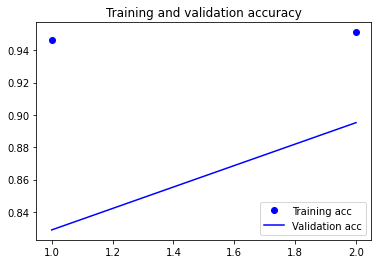

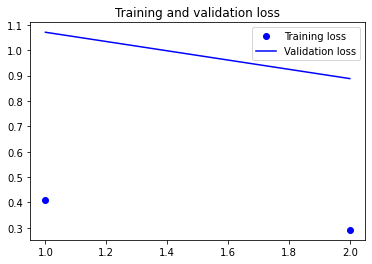

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()